# Seaborn Categorical Data
Tutorial: https://seaborn.pydata.org/tutorial/categorical.html  
API: https://seaborn.pydata.org/api.html#categorical-api

#### Agenda:
- Barplot  
- Catplot  
- Boxplot

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

In [2]:
tips = pd.read_csv('data/tips.csv')
tips.head(5)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Barplot
Tipping percentage by day.  
https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

In [3]:
# tip_pct the new column
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

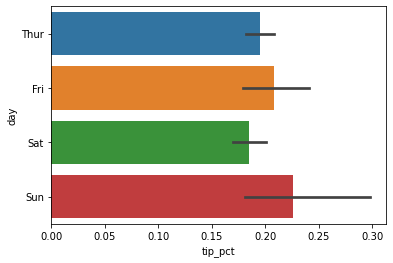

In [12]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', order=['Thur', 'Fri', 'Sat', 'Sun'])
# tip_pct and day are both columns in a DataFrame

Because there are multiple observations for each value in the day, the bars are the **average** value of *tip_pct*.  

#### The black lines drawn on the bars represent the 95 confidence interval.
In other words, you can be 95% certain that the actual percent of all tips will be between the left and right edges of the bars.

How are they calculated?  https://datascience.stackexchange.com/questions/8645/python-seaborn-how-are-error-bars-computed-in-barplots

#### *seaborn.barplot()* hue 

hue option enables use to split by an additional categorical value.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

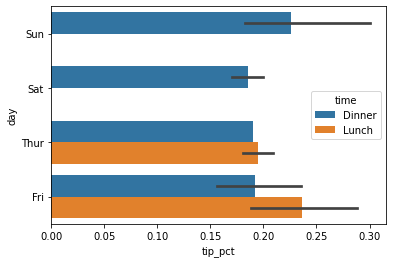

In [14]:
# sns.set(style="whitegrid")
# y - Tableau Rows shelf
# x - Tableau Columns shelf

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')


### Catplot (formerly known as Factorplot)
  
  
The definitions of data subsets are adjusted by the followig parameters:
***hue***, ***col*** and ***row***.
https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

In [6]:
tips[tips.tip_pct > 1]

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


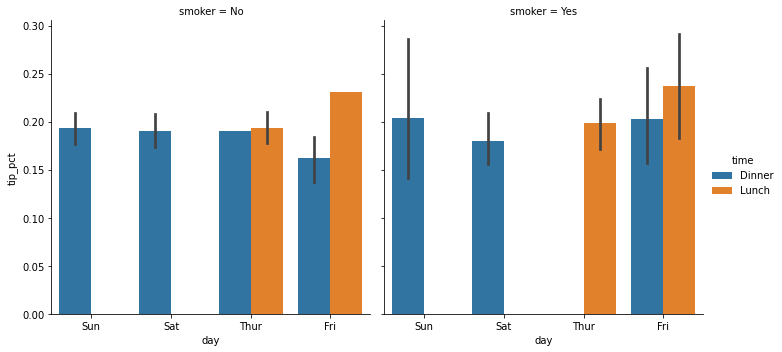

In [7]:
sns.factorplot(x='day', y='tip_pct', 
               hue='time', 
               col='smoker',
               kind='bar', 
               data=tips[tips.tip_pct < 1])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


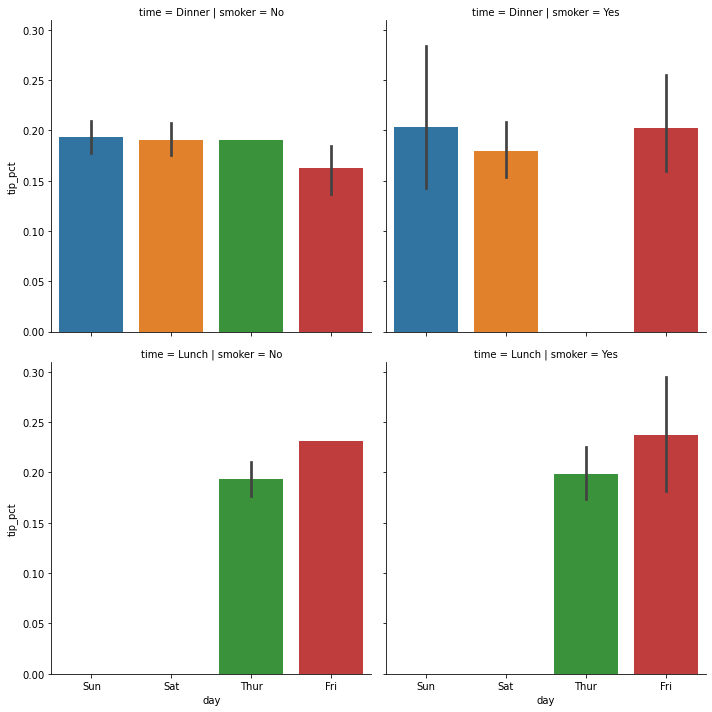

In [8]:
sns.factorplot(x='day', y='tip_pct', 
               col='smoker', row='time', 
               kind='bar', 
               data=tips[tips.tip_pct < 1])

## Distributions of observations within categories.
### Boxplot
A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum.  
Because of the extending lines, this type of graph is sometimes called a box-and-whisker plot.
https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
https://whatis.techtarget.com/definition/box-plot

<AxesSubplot:xlabel='tip_pct'>

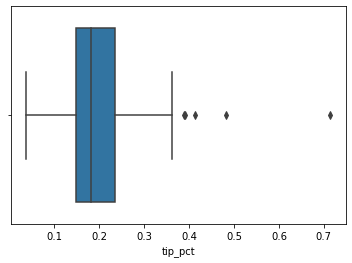

In [9]:
sns.boxplot(x=tips.tip_pct[tips.tip_pct < 1])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


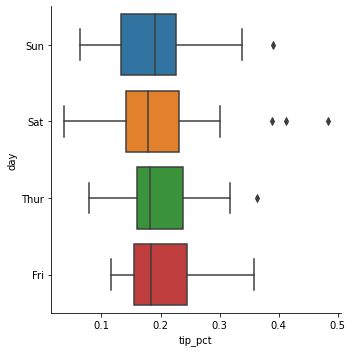

In [10]:
sns.factorplot(x='tip_pct', y='day', 
               kind='box',
               data=tips[tips.tip_pct < 0.5])